**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
# %load_ext pycodestyle_magic

In [2]:
# %%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X = np.array(X).astype(float)
        self.trains = X.shape[0]
        self.features = X.shape[1]
        self.X_square = np.sum(self.X ** 2, axis=1).reshape(-1, 1)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X)
        
        self.y = np.array(y).astype('int64')
        self.classes = np.unique(y)
        self.n_classes = self.classes.shape[0]
        return self

    def predict(self, X):
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1, self.prob_brute(X))

    def _probs(self, arg):
        return np.bincount(arg, minlength=self.n_classes) / self.n_neighbors
    
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return np.apply_along_axis(self._probs, 1, self.prob_brute(X))
        elif self.algorithm == 'kd_tree':
            return np.apply_along_axis(self._probs, 1, self.predict_kdtree(X))
        
    def predict_kdtree(self, X):
        _, top = self.tree.query(X, k=self.n_neighbors)
        return self.y[top].astype('int64')
    
    def prob_brute(self, X):
        X = X.astype(float)
        X_square = np.sum(X ** 2, axis=1).reshape(1, -1)
        dist = np.sqrt(self.X_square - 2 * np.matmul(self.X, X.T) + X_square)
        top = np.argpartition(dist, self.n_neighbors - 1, axis=0)[:self.n_neighbors:].T
        return self.y[top].astype('int64')
    
    def score(self, X, y):
        return np.average(y == self.predict(X))

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 926 µs, sys: 216 µs, total: 1.14 ms
Wall time: 998 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 538 µs, sys: 671 µs, total: 1.21 ms
Wall time: 1.03 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

CPU times: user 1.4 ms, sys: 491 µs, total: 1.89 ms
Wall time: 1.59 ms


array([0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 123 ms, sys: 6.4 ms, total: 130 ms
Wall time: 129 ms


array([0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 887 µs, sys: 292 µs, total: 1.18 ms
Wall time: 942 µs


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.24 ms, sys: 757 µs, total: 2 ms
Wall time: 1.35 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt


Best n_neighbors is 17 with score = 0.9778666666666668


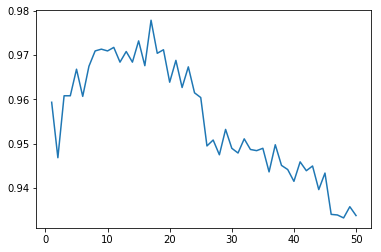

In [14]:
#MAX_N = len(y_train)
MAX_N = 50
TESTS_N = 500

best = (0, 0)
res = []
for i in range(1, MAX_N + 1):
    test_res = []
    for test in range(TESTS_N):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                            test_size=0.1, stratify=iris.target)
        
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        test_res.append(my_clf.score(X_test, y_test))
    res.append(np.mean(test_res))
best = (max(res), np.argmax(res) + 1)
print(f'Best n_neighbors is {best[1]} with score = {best[0]}')

plt.plot(list(range(1, MAX_N + 1)), res)
plt.show()

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 40.6 s, sys: 581 ms, total: 41.1 s
Wall time: 41.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 609 ms, sys: 617 ms, total: 1.23 s
Wall time: 1.43 s


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

CPU times: user 1min 3s, sys: 897 ms, total: 1min 4s
Wall time: 1min 6s


array([9., 1., 0., 2., 7., 1., 7., 3., 9., 0., 5., 1., 3., 8., 0., 8., 8.,
       9., 6., 7., 2., 2., 6., 7., 0., 6., 2., 3., 8., 4., 0., 3., 2., 6.,
       3., 2., 2., 7., 4., 6., 0., 9., 8., 1., 7., 3., 5., 4., 1., 3., 1.,
       6., 1., 8., 5., 6., 9., 8., 4., 5., 5., 5., 2., 6., 3., 6., 2., 1.,
       0., 3., 6., 0., 2., 4., 9., 4., 0., 1., 6., 6., 1., 0., 9., 3., 5.,
       4., 8., 1., 1., 3., 5., 7., 1., 0., 7., 3., 0., 3., 2., 9., 2., 0.,
       7., 6., 1., 6., 3., 5., 3., 8., 7., 9., 4., 3., 4., 3., 8., 7., 8.,
       1., 1., 5., 9., 3., 7., 6., 7., 2., 4., 4., 0., 2., 7., 9., 2., 8.,
       6., 1., 1., 6., 1., 0., 3., 4., 2., 5., 9., 8., 3., 2., 3., 4., 5.,
       0., 1., 4., 1., 1., 9., 4., 4., 1., 6., 5., 1., 1., 6., 4., 4., 0.,
       4., 2., 2., 0., 1., 1., 0., 7., 2., 4., 5., 5., 1., 4., 1., 8., 9.,
       6., 7., 2., 9., 2., 2., 6., 7., 7., 3., 2., 4., 3., 2., 5., 1., 6.,
       5., 2., 1., 5., 8., 0., 5., 4., 7., 4., 6., 0., 2., 9., 4., 5., 3.,
       7., 3., 4., 1., 4.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 5.14 s, sys: 1.04 s, total: 6.19 s
Wall time: 4.75 s


array([9, 1, 0, 2, 7, 1, 7, 3, 9, 0, 5, 1, 3, 8, 0, 8, 8, 9, 6, 7, 2, 2,
       6, 7, 0, 6, 2, 3, 8, 4, 0, 3, 2, 6, 3, 2, 2, 7, 4, 6, 0, 9, 8, 1,
       7, 3, 5, 4, 1, 3, 1, 6, 1, 8, 5, 6, 9, 8, 4, 5, 5, 5, 2, 6, 3, 6,
       2, 1, 0, 3, 6, 0, 2, 4, 9, 4, 0, 1, 6, 6, 1, 0, 9, 3, 5, 4, 8, 1,
       1, 3, 5, 7, 1, 0, 7, 3, 0, 3, 2, 9, 2, 0, 7, 6, 1, 6, 3, 5, 3, 8,
       7, 9, 4, 3, 4, 3, 8, 7, 8, 1, 1, 5, 9, 3, 7, 6, 7, 2, 4, 4, 0, 2,
       7, 9, 2, 8, 6, 1, 1, 6, 1, 0, 3, 4, 2, 5, 9, 8, 3, 2, 3, 4, 5, 0,
       1, 4, 1, 1, 9, 4, 4, 1, 6, 5, 1, 1, 6, 4, 4, 0, 4, 2, 2, 0, 1, 1,
       0, 7, 2, 4, 5, 5, 1, 4, 1, 8, 9, 6, 7, 2, 9, 2, 2, 6, 7, 7, 3, 2,
       4, 3, 2, 5, 1, 6, 5, 2, 1, 5, 8, 0, 5, 4, 7, 4, 6, 0, 2, 9, 4, 5,
       3, 7, 3, 4, 1, 4, 4, 0, 8, 9, 1, 5, 3, 9, 2, 2, 7, 7, 7, 5, 0, 4,
       3, 8, 8, 1, 3, 0, 6, 6, 0, 0, 3, 7, 9, 3, 8, 7, 6, 4, 8, 8, 7, 1,
       1, 4, 7, 8, 0, 0, 0, 7, 9, 5, 2, 6, 3, 4, 4, 1, 7, 4, 7, 5, 0, 6,
       8, 9, 9, 3, 6, 2, 2, 2, 6, 9, 6, 6, 8, 5, 0,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 2s, sys: 675 ms, total: 1min 3s
Wall time: 1min 4s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 5.09 s, sys: 1.02 s, total: 6.11 s
Wall time: 4.82 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9728571428571429

In [25]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 38.9 s, sys: 588 ms, total: 39.5 s
Wall time: 39.9 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 39.5 s, sys: 885 ms, total: 40.4 s
Wall time: 40.6 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [30]:
%time clf.predict(X_test)

CPU times: user 56.1 s, sys: 81.6 ms, total: 56.2 s
Wall time: 56.3 s


array([7., 2., 8., 1., 1., 9., 7., 9., 1., 4., 5., 6., 0., 6., 0., 4., 3.,
       5., 8., 5., 3., 8., 3., 2., 5., 3., 4., 2., 4., 3., 4., 6., 2., 7.,
       7., 9., 1., 9., 4., 3., 3., 5., 8., 9., 5., 2., 8., 6., 3., 3., 8.,
       6., 9., 3., 2., 5., 5., 8., 2., 6., 9., 8., 5., 6., 7., 9., 2., 5.,
       3., 6., 2., 2., 2., 7., 9., 8., 2., 6., 0., 4., 6., 8., 2., 3., 9.,
       7., 3., 0., 2., 2., 6., 2., 8., 1., 0., 1., 3., 2., 5., 0., 2., 5.,
       1., 2., 6., 3., 8., 7., 2., 7., 0., 2., 8., 5., 1., 3., 7., 5., 3.,
       7., 5., 7., 1., 4., 6., 8., 1., 8., 2., 3., 5., 0., 0., 6., 5., 5.,
       8., 6., 1., 7., 9., 4., 9., 3., 9., 7., 2., 1., 1., 6., 2., 4., 8.,
       8., 1., 3., 4., 4., 1., 4., 6., 9., 3., 6., 6., 0., 3., 1., 2., 0.,
       3., 6., 4., 5., 4., 8., 9., 0., 2., 9., 8., 3., 0., 4., 8., 0., 8.,
       7., 3., 7., 9., 3., 8., 3., 6., 5., 2., 6., 5., 3., 1., 1., 7., 6.,
       9., 5., 1., 5., 7., 1., 0., 7., 1., 9., 6., 7., 4., 1., 1., 4., 7.,
       9., 7., 7., 2., 9.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 4.81 s, sys: 1.26 s, total: 6.07 s
Wall time: 4.63 s


array([7, 2, 8, 1, 1, 9, 7, 9, 1, 4, 5, 6, 0, 6, 0, 4, 3, 5, 8, 5, 3, 8,
       3, 2, 5, 3, 4, 2, 4, 3, 4, 6, 2, 7, 7, 9, 1, 9, 4, 3, 3, 5, 8, 9,
       5, 2, 8, 6, 3, 3, 8, 6, 9, 3, 2, 5, 5, 8, 2, 6, 9, 8, 5, 6, 7, 9,
       2, 5, 3, 6, 2, 2, 2, 7, 9, 8, 2, 6, 0, 4, 6, 8, 2, 3, 9, 7, 3, 0,
       2, 2, 6, 2, 8, 1, 0, 1, 3, 2, 5, 0, 2, 5, 1, 2, 6, 3, 8, 7, 2, 7,
       0, 2, 8, 5, 1, 3, 7, 5, 3, 7, 5, 7, 1, 4, 6, 8, 1, 8, 2, 3, 5, 0,
       0, 6, 5, 5, 8, 6, 1, 7, 9, 4, 9, 3, 9, 7, 2, 1, 1, 6, 2, 4, 8, 8,
       1, 3, 4, 4, 1, 4, 6, 9, 3, 6, 6, 0, 3, 1, 2, 0, 3, 6, 4, 5, 4, 8,
       9, 0, 2, 9, 8, 3, 0, 4, 8, 0, 8, 7, 3, 7, 9, 3, 8, 3, 6, 5, 2, 6,
       5, 3, 1, 1, 7, 6, 9, 5, 1, 5, 7, 1, 0, 7, 1, 9, 6, 7, 4, 1, 1, 4,
       7, 9, 7, 7, 2, 9, 4, 0, 1, 8, 2, 0, 2, 5, 8, 2, 3, 7, 1, 5, 9, 6,
       8, 4, 7, 0, 3, 2, 2, 4, 6, 1, 7, 4, 6, 7, 0, 3, 1, 0, 8, 3, 0, 3,
       7, 6, 8, 9, 5, 5, 3, 5, 8, 4, 0, 8, 8, 4, 6, 7, 7, 4, 4, 9, 2, 7,
       0, 6, 3, 3, 0, 8, 5, 7, 0, 2, 6, 5, 2, 6, 6,

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 56.7 s, sys: 133 ms, total: 56.8 s
Wall time: 57 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 46.8 s, sys: 80.5 ms, total: 46.9 s
Wall time: 47 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9614285714285714

In [35]:
my_clf.score(X_test, y_test)

0.9614285714285714

Задание 5

In [36]:
# seaborn
"""
Библиотека, основанная на matplotlib, для визуализации данных
"""
# matplotlib
"""
Билбиотека для потсроения граффиков по данным
"""
# train_test_split
"""
Функция разбивающая массивы или матрицы на тренировочную и тестовую выборки.
"""
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
"""
Конвйер, позволяет последовательно преобразовать данные
"""
# StandardScaler (from sklearn.preprocessing import StandardScaler)
"""
Приводит распределение к нормальному виду: среднее значение 0 а стандартное отклонение 1
"""
# ClassifierMixin
"""
Базовый класс классификаторов sklearn
"""
# NeighborsBase
"""
Базовый класс для KNN в sklearn
"""
# KNeighborsMixin
"""
Еще один базовый класс для KNN в sklearn, там написаны методы для поиска блиайших соседей
"""
# SupervisedIntegerMixin
"""
Базовый класс в sklearn, в котором напиан метод fit() для обучения модели
"""

'\nБазовый класс в sklearn, в котором напиан метод fit() для обучения модели\n'